In [ ]:
import cv2

import glob
import os
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.utils import load_img
from numpy import savez_compressed
import random

from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d = './drive/MyDrive/cropped_dl_dataset'
lst=[]
for a in os.listdir(d):
  if os.path.isdir(os.path.join(d,a)):
    lst.append(os.path.join(d, a))

lst

['./drive/MyDrive/cropped_dl_dataset/Brad Pitt',
 './drive/MyDrive/cropped_dl_dataset/Angelina Jolie',
 './drive/MyDrive/cropped_dl_dataset/Denzel Washington',
 './drive/MyDrive/cropped_dl_dataset/Hugh Jackman',
 './drive/MyDrive/cropped_dl_dataset/Jennifer Lawrence',
 './drive/MyDrive/cropped_dl_dataset/Johnny Depp',
 './drive/MyDrive/cropped_dl_dataset/Kate Winslet',
 './drive/MyDrive/cropped_dl_dataset/Leonardo DiCaprio',
 './drive/MyDrive/cropped_dl_dataset/Megan Fox',
 './drive/MyDrive/cropped_dl_dataset/Natalie Portman',
 './drive/MyDrive/cropped_dl_dataset/Nicole Kidman',
 './drive/MyDrive/cropped_dl_dataset/Robert Downey Jr',
 './drive/MyDrive/cropped_dl_dataset/Sandra Bullock',
 './drive/MyDrive/cropped_dl_dataset/Scarlett Johansson',
 './drive/MyDrive/cropped_dl_dataset/Tom Cruise',
 './drive/MyDrive/cropped_dl_dataset/Tom Hanks',
 './drive/MyDrive/cropped_dl_dataset/Will Smith']

In [ ]:
from google.colab.patches import cv2_imshow

src = []
tgt = []
P = []
for path in tqdm(lst):
    path1 = path +"/side/*.jpg"
    folder = path.split('/')[-1]
    tgtpath = path+"/"+folder+"_01.jpg"
    print('path1',path1,"path", path, "folder", folder, "tgtpath",tgtpath)
    for file in glob.glob(path1):
        print('fol',file)
        a= cv2.imread(file)
        a= cv2.resize(a, (256,256), interpolation = cv2.INTER_AREA)
        src.append(a)
        b= cv2.imread(tgtpath)
        b= cv2.resize(b, (256,256), interpolation = cv2.INTER_AREA)
        print("b", b)
        tgt.append(b)

print(folder)
print('tgtpath',tgtpath)
print(path1)

  0%|          | 0/17 [00:00<?, ?it/s]

path1 ./drive/MyDrive/cropped_dl_dataset/Brad Pitt/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Brad Pitt folder Brad Pitt tgtpath ./drive/MyDrive/cropped_dl_dataset/Brad Pitt/Brad Pitt_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Brad Pitt/side/Brad Pitt_02.jpg
b [[[  0   3 252]
  [  0   3 252]
  [  0   2 251]
  ...
  [  0   2 254]
  [  0   3 254]
  [  0   3 254]]

 [[  0   3 252]
  [  0   3 252]
  [  0   2 251]
  ...
  [  0   2 254]
  [  0   3 254]
  [  0   3 254]]

 [[  0   2 251]
  [  0   2 251]
  [  1   2 250]
  ...
  [  2   5 245]
  [  1   5 246]
  [  1   5 246]]

 ...

 [[  0   2 253]
  [  0   2 253]
  [  3   5 244]
  ...
  [ 31  32 205]
  [ 19  23 203]
  [ 19  23 203]]

 [[  0   3 255]
  [  0   3 255]
  [  2   5 246]
  ...
  [ 20  22 202]
  [ 14  19 206]
  [ 14  19 206]]

 [[  0   3 255]
  [  0   3 255]
  [  2   5 246]
  ...
  [ 20  22 202]
  [ 14  19 206]
  [ 14  19 206]]]
fol ./drive/MyDrive/cropped_dl_dataset/Brad Pitt/side/Brad Pitt_03.jpg
b [[[  0   3 252]
  [  0   

 12%|█▏        | 2/17 [00:00<00:01,  9.86it/s]

b [[[  1   3 249]
  [  1   3 249]
  [  2   4 249]
  ...
  [  3   3 249]
  [  8   1 250]
  [ 12   1 252]]

 [[  2   2 248]
  [ 21  21 235]
  [ 61  58 224]
  ...
  [ 24  28 205]
  [ 22  22 219]
  [ 11  11 221]]

 [[  6   3 250]
  [ 63  58 224]
  [219 207 252]
  ...
  [ 64  74 152]
  [ 49  62 183]
  [ 20  36 186]]

 ...

 [[  3   2 248]
  [ 52  46 218]
  [133 119 188]
  ...
  [  3   3  54]
  [  1   1  97]
  [ 25  29 167]]

 [[  2   2 249]
  [ 46  42 232]
  [114 104 214]
  ...
  [  0   0  96]
  [  0   0 125]
  [ 16  20 186]]

 [[  2   2 252]
  [ 19  16 225]
  [ 44  37 187]
  ...
  [ 28  31 171]
  [ 19  20 188]
  [ 20  22 212]]]
fol ./drive/MyDrive/cropped_dl_dataset/Angelina Jolie/side/Angelina Jolie_03.jpg
b [[[  1   3 249]
  [  1   3 249]
  [  2   4 249]
  ...
  [  3   3 249]
  [  8   1 250]
  [ 12   1 252]]

 [[  2   2 248]
  [ 21  21 235]
  [ 61  58 224]
  ...
  [ 24  28 205]
  [ 22  22 219]
  [ 11  11 221]]

 [[  6   3 250]
  [ 63  58 224]
  [219 207 252]
  ...
  [ 64  74 152]
  [ 49 

 18%|█▊        | 3/17 [00:00<00:03,  3.54it/s]

b [[[  3   1 251]
  [  3   1 251]
  [  4   2 252]
  ...
  [  0   1 255]
  [  0   1 254]
  [  0   1 254]]

 [[  3   1 251]
  [  3   1 251]
  [  5   2 251]
  ...
  [  1   2 251]
  [  1   2 251]
  [  1   2 251]]

 [[  2   0 252]
  [  3   1 251]
  [ 10   6 242]
  ...
  [ 12  10 224]
  [  9  10 231]
  [  9  10 232]]

 ...

 [[  0   2 254]
  [  1   3 251]
  [  7  13 226]
  ...
  [  0   0 150]
  [ 19  17 192]
  [ 22  19 198]]

 [[  0   1 252]
  [  0   2 250]
  [  4  13 233]
  ...
  [ 19  18 190]
  [ 20  19 209]
  [ 20  20 212]]

 [[  0   1 252]
  [  0   2 250]
  [  4  13 234]
  ...
  [ 22  20 196]
  [ 20  20 212]
  [ 20  20 214]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Hugh Jackman/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Hugh Jackman folder Hugh Jackman tgtpath ./drive/MyDrive/cropped_dl_dataset/Hugh Jackman/Hugh Jackman_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Hugh Jackman/side/Hugh Jackman_02.jpg
b [[[  0   2 255]
  [  0   2 255]
  [  0   1 254]
  ...
  [  2   2 251]
  [  

 24%|██▎       | 4/17 [00:03<00:16,  1.29s/it]

b [[[  0   2 255]
  [  0   2 255]
  [  0   1 254]
  ...
  [  2   2 251]
  [  1   3 251]
  [  1   3 251]]

 [[  0   2 255]
  [  0   2 255]
  [  0   1 254]
  ...
  [  2   2 251]
  [  1   3 251]
  [  1   3 251]]

 [[  0   1 253]
  [  0   1 253]
  [  0   2 248]
  ...
  [  8   9 236]
  [  8  10 240]
  [  8  10 240]]

 ...

 [[  0   3 254]
  [  0   3 254]
  [  4   8 235]
  ...
  [ 94  93 222]
  [ 22  22 204]
  [ 22  22 204]]

 [[  0   5 253]
  [  0   5 253]
  [  4  11 239]
  ...
  [ 22  21 200]
  [ 18  18 208]
  [ 18  18 208]]

 [[  0   5 253]
  [  0   5 253]
  [  4  11 239]
  ...
  [ 22  21 200]
  [ 18  18 208]
  [ 18  18 208]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Jennifer Lawrence/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Jennifer Lawrence folder Jennifer Lawrence tgtpath ./drive/MyDrive/cropped_dl_dataset/Jennifer Lawrence/Jennifer Lawrence_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Jennifer Lawrence/side/Jennifer Lawrence_02.jpg
b [[[  0   1 252]
  [  1   3 253]
  [  5  

 29%|██▉       | 5/17 [00:06<00:21,  1.82s/it]

b [[[  0   1 252]
  [  1   3 253]
  [  5   2 251]
  ...
  [  5   2 248]
  [  6   2 251]
  [  4   1 252]]

 [[  0   3 252]
  [  5   9 236]
  [ 23  32 224]
  ...
  [ 37  45 223]
  [ 34  39 231]
  [ 11  15 226]]

 [[  2   2 247]
  [ 20  31 220]
  [ 71 101 206]
  ...
  [149 177 249]
  [147 167 254]
  [ 29  43 192]]

 ...

 [[  4   2 250]
  [ 40  52 225]
  [173 206 254]
  ...
  [185 183 240]
  [175 174 253]
  [ 47  46 182]]

 [[  1   4 247]
  [ 35  49 230]
  [173 198 255]
  ...
  [176 173 254]
  [172 169 255]
  [ 40  40 200]]

 [[  0   7 245]
  [  5  22 223]
  [ 26  48 193]
  ...
  [ 53  48 180]
  [ 40  38 197]
  [ 20  19 202]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Johnny Depp/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Johnny Depp folder Johnny Depp tgtpath ./drive/MyDrive/cropped_dl_dataset/Johnny Depp/Johnny Depp_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Johnny Depp/side/Johnny Depp_02.jpg
b [[[  0   2 251]
  [  0   2 251]
  [  1   3 252]
  ...
  [  5   0 253]
  [  4   0 2

 35%|███▌      | 6/17 [00:09<00:23,  2.15s/it]

b [[[  0   2 251]
  [  0   2 251]
  [  1   3 252]
  ...
  [  5   0 253]
  [  4   0 254]
  [  3   0 254]]

 [[  0   1 250]
  [  2   3 249]
  [  4   5 247]
  ...
  [  8   4 239]
  [  8   5 242]
  [  8   6 245]]

 [[  0   0 250]
  [  3   3 247]
  [  7   7 243]
  ...
  [ 12   9 225]
  [ 13  11 231]
  [ 13  12 236]]

 ...

 [[  0   3 251]
  [  4   8 237]
  [  8  13 222]
  ...
  [124 121 255]
  [ 74  72 226]
  [ 26  24 197]]

 [[  0   5 251]
  [  2   8 237]
  [  4  12 223]
  ...
  [ 77  74 226]
  [ 50  48 214]
  [ 23  22 202]]

 [[  0   7 252]
  [  0   9 239]
  [  0  11 225]
  ...
  [ 31  28 198]
  [ 26  24 203]
  [ 21  20 208]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Kate Winslet/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Kate Winslet folder Kate Winslet tgtpath ./drive/MyDrive/cropped_dl_dataset/Kate Winslet/Kate Winslet_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Kate Winslet/side/Kate Winslet_02.jpg
b [[[  0   2 249]
  [  0   3 252]
  [  0   1 252]
  ...
  [  1   1 254]
  [  

 41%|████      | 7/17 [00:12<00:23,  2.35s/it]

b [[[  0   2 249]
  [  0   3 252]
  [  0   1 252]
  ...
  [  1   1 254]
  [  5   1 255]
  [  4   0 252]]

 [[  0   2 251]
  [  5   6 244]
  [ 13  10 229]
  ...
  [ 14  14 217]
  [ 13   9 226]
  [ 10   4 245]]

 [[  1   1 252]
  [ 14  11 230]
  [ 34  26 185]
  ...
  [ 18  17 129]
  [ 14  10 162]
  [ 14   8 224]]

 ...

 [[  2   1 254]
  [ 13  13 217]
  [  9  10 124]
  ...
  [ 21  25  61]
  [ 13  15 112]
  [ 18  15 212]]

 [[  6   3 254]
  [ 12   8 228]
  [  6   5 158]
  ...
  [ 10  13 109]
  [  9   9 149]
  [ 14  10 221]]

 [[  2   0 251]
  [ 11   6 247]
  [ 12   8 226]
  ...
  [ 15  16 210]
  [ 13  11 222]
  [  8   6 242]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Leonardo DiCaprio/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Leonardo DiCaprio folder Leonardo DiCaprio tgtpath ./drive/MyDrive/cropped_dl_dataset/Leonardo DiCaprio/Leonardo DiCaprio_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Leonardo DiCaprio/side/Leonardo DiCaprio_02.jpg
b [[[  6   2 255]
  [  1   0 250]
  [  5  

 47%|████▋     | 8/17 [00:14<00:22,  2.48s/it]

b [[[  6   2 255]
  [  1   0 250]
  [  5   3 254]
  ...
  [  7   0 253]
  [  1   0 251]
  [  0   0 253]]

 [[  0   0 251]
  [ 13  10 246]
  [ 10  10 210]
  ...
  [ 18  13 205]
  [ 20  18 225]
  [  8  10 226]]

 [[  4   2 254]
  [ 10  10 210]
  [  0   0  78]
  ...
  [  0   0  61]
  [  0   0  88]
  [ 28  31 179]]

 ...

 [[  4   0 252]
  [ 19  15 208]
  [  0   0  61]
  ...
  [  0   0  40]
  [  0   0  82]
  [ 37  37 179]]

 [[  0   7 249]
  [  4  13 214]
  [  0   0  89]
  ...
  [  0   0  79]
  [  0   0 118]
  [ 20  21 193]]

 [[  0   5 246]
  [  4  18 226]
  [ 26  32 178]
  ...
  [ 37  37 173]
  [ 22  23 194]
  [ 22  24 212]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Megan Fox/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Megan Fox folder Megan Fox tgtpath ./drive/MyDrive/cropped_dl_dataset/Megan Fox/Megan Fox_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Megan Fox/side/Megan Fox_02.jpg
b [[[  0   0 253]
  [  0   1 253]
  [  0   4 255]
  ...
  [  8   0 252]
  [ 13   0 254]
  [ 14   0

 53%|█████▎    | 9/17 [00:17<00:20,  2.57s/it]

b [[[  0   0 253]
  [  0   1 253]
  [  0   4 255]
  ...
  [  8   0 252]
  [ 13   0 254]
  [ 14   0 255]]

 [[  0   0 253]
  [  0   1 253]
  [  0   3 251]
  ...
  [ 10   2 245]
  [ 14   3 249]
  [ 15   3 250]]

 [[  0   2 255]
  [  0   2 251]
  [  0   0 238]
  ...
  [ 15  10 226]
  [ 17  12 234]
  [ 18  12 237]]

 ...

 [[  0   0 254]
  [  1   2 247]
  [  6   8 226]
  ...
  [ 82  85 247]
  [ 37  41 215]
  [ 22  26 205]]

 [[  0   2 255]
  [  2   4 249]
  [  9  11 233]
  ...
  [ 36  39 216]
  [ 21  23 211]
  [ 16  18 209]]

 [[  0   2 255]
  [  2   4 250]
  [ 10  12 236]
  ...
  [ 21  24 206]
  [ 16  18 210]
  [ 14  16 211]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Natalie Portman/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Natalie Portman folder Natalie Portman tgtpath ./drive/MyDrive/cropped_dl_dataset/Natalie Portman/Natalie Portman_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Natalie Portman/side/Natalie Portman_02.jpg
b [[[  0   2 253]
  [  0   0 252]
  [  2   0 253]
  ...


 59%|█████▉    | 10/17 [00:19<00:17,  2.46s/it]

b [[[  0   2 253]
  [  0   0 252]
  [  2   0 253]
  ...
  [  0   0 252]
  [  0   2 255]
  [  0   0 253]]

 [[  0   0 252]
  [  7   8 245]
  [ 18  15 222]
  ...
  [ 20  24 209]
  [ 12  17 218]
  [  7   9 246]]

 [[  4   0 250]
  [ 20  15 221]
  [134 133 252]
  ...
  [223 225 255]
  [211 214 255]
  [ 15  14 215]]

 ...

 [[ 15   0 255]
  [ 16  13 211]
  [  8  30 116]
  ...
  [ 20  56  96]
  [  1  21 114]
  [ 15  17 218]]

 [[ 11   0 253]
  [ 18  16 228]
  [  1  15 142]
  ...
  [  2  30 123]
  [  0   7 137]
  [  8   8 221]]

 [[  1   1 255]
  [  0   3 241]
  [  6  15 225]
  ...
  [ 18  20 221]
  [  6   6 219]
  [ 13   8 246]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Nicole Kidman/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Nicole Kidman folder Nicole Kidman tgtpath ./drive/MyDrive/cropped_dl_dataset/Nicole Kidman/Nicole Kidman_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Nicole Kidman/side/Nicole Kidman_02.jpg
b [[[  0   3 254]
  [  0   0 251]
  [  6   2 254]
  ...
  [  3   0 253

 65%|██████▍   | 11/17 [00:22<00:15,  2.56s/it]

b [[[  0   3 254]
  [  0   0 251]
  [  6   2 254]
  ...
  [  3   0 253]
  [  2   2 255]
  [  0   1 254]]

 [[  0   2 255]
  [  0   4 246]
  [  9   8 230]
  ...
  [ 18  15 223]
  [  5   4 225]
  [  8  10 237]]

 [[  7   0 253]
  [ 14  11 234]
  [ 24  29 190]
  ...
  [  4   3 104]
  [  3   3 135]
  [ 24  23 201]]

 ...

 [[  2   4 252]
  [  2  13 226]
  [ 36  62 207]
  ...
  [ 12  41 147]
  [  6  28 173]
  [ 10  30 195]]

 [[  0   0 249]
  [  5  13 235]
  [ 36  55 224]
  ...
  [ 11  29 174]
  [  6  19 195]
  [  9  20 212]]

 [[  2   2 255]
  [  2   7 235]
  [ 10  25 207]
  ...
  [ 14  28 192]
  [ 11  19 211]
  [  9  15 222]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Robert Downey Jr/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Robert Downey Jr folder Robert Downey Jr tgtpath ./drive/MyDrive/cropped_dl_dataset/Robert Downey Jr/Robert Downey Jr_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Robert Downey Jr/side/Robert Downey Jr_02.jpg
b [[[  0   0 253]
  [  1   0 252]
  [ 10   1 255]

 71%|███████   | 12/17 [00:24<00:12,  2.48s/it]

b [[[  0   0 253]
  [  1   0 252]
  [ 10   1 255]
  ...
  [  9   0 254]
  [  6   0 250]
  [  4   2 255]]

 [[  0   0 253]
  [  5   7 246]
  [  5   9 221]
  ...
  [ 26  18 215]
  [ 18  10 220]
  [ 10   7 246]]

 [[  1   2 254]
  [  0  11 223]
  [147 173 250]
  ...
  [  2   1  72]
  [  2   1 106]
  [ 13  12 218]]

 ...

 [[  4   1 254]
  [  3  17 220]
  [ 50  96 202]
  ...
  [192 202 230]
  [177 182 253]
  [ 20  17 211]]

 [[  1   0 252]
  [  3  14 228]
  [ 44  79 220]
  ...
  [180 184 253]
  [161 164 252]
  [ 15  10 220]]

 [[  2   2 255]
  [  0   1 241]
  [  6  18 230]
  ...
  [ 21  17 214]
  [ 12   6 218]
  [ 11  11 249]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Sandra Bullock/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Sandra Bullock folder Sandra Bullock tgtpath ./drive/MyDrive/cropped_dl_dataset/Sandra Bullock/Sandra Bullock_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Sandra Bullock/side/Sandra Bullock_02.jpg
b [[[  0   2 255]
  [  0   1 254]
  [  0   0 251]
  ...
  [  1 

 76%|███████▋  | 13/17 [00:27<00:10,  2.56s/it]

b [[[  0   2 255]
  [  0   1 254]
  [  0   0 251]
  ...
  [  1   0 253]
  [  3   1 254]
  [  4   2 255]]

 [[  0   1 254]
  [  1   2 253]
  [  2   3 250]
  ...
  [  2   5 245]
  [  3   3 249]
  [  3   2 251]]

 [[  0   0 251]
  [  2   3 250]
  [  8  10 248]
  ...
  [  6  21 224]
  [  2   8 235]
  [  0   4 239]]

 ...

 [[  0   4 255]
  [  2   6 246]
  [  7  13 220]
  ...
  [126 134 255]
  [ 47  44 232]
  [ 19  13 224]]

 [[  0   2 252]
  [  0   3 248]
  [  2   8 235]
  ...
  [ 47  45 233]
  [ 20  15 237]
  [ 11   5 238]]

 [[  0   1 251]
  [  0   2 248]
  [  0   6 240]
  ...
  [ 20  14 225]
  [ 11   5 238]
  [  8   2 243]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Scarlett Johansson/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Scarlett Johansson folder Scarlett Johansson tgtpath ./drive/MyDrive/cropped_dl_dataset/Scarlett Johansson/Scarlett Johansson_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Scarlett Johansson/side/Scarlett Johansson_02.jpg
b [[[  0   1 254]
  [  0   1 254]
 

 82%|████████▏ | 14/17 [00:30<00:07,  2.61s/it]

b [[[  0   1 254]
  [  0   1 254]
  [  0   1 253]
  ...
  [  0   0 254]
  [  0   0 252]
  [  0   0 252]]

 [[  0   1 254]
  [  0   1 254]
  [  0   1 253]
  ...
  [  0   0 254]
  [  0   0 252]
  [  0   0 252]]

 [[  0   2 255]
  [  0   2 255]
  [  1   2 243]
  ...
  [  7   9 230]
  [  7  10 240]
  [  7  10 240]]

 ...

 [[  0   0 253]
  [  0   0 253]
  [  4  11 231]
  ...
  [  2   2 176]
  [ 16  16 207]
  [ 16  16 207]]

 [[  0   3 255]
  [  0   3 255]
  [  1  11 235]
  ...
  [ 22  20 211]
  [ 17  16 220]
  [ 17  16 220]]

 [[  0   3 255]
  [  0   3 255]
  [  1  11 235]
  ...
  [ 22  20 211]
  [ 17  16 220]
  [ 17  16 220]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Tom Cruise/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Tom Cruise folder Tom Cruise tgtpath ./drive/MyDrive/cropped_dl_dataset/Tom Cruise/Tom Cruise_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Tom Cruise/side/Tom Cruise_02.jpg
b [[[  1   0 254]
  [  3   1 254]
  [  3   1 250]
  ...
  [ 10   2 251]
  [  2   1 252]
  [

 88%|████████▊ | 15/17 [00:33<00:05,  2.67s/it]

b [[[  1   0 254]
  [  3   1 254]
  [  3   1 250]
  ...
  [ 10   2 251]
  [  2   1 252]
  [  1   1 251]]

 [[  4   2 254]
  [  7   6 233]
  [ 12  11 200]
  ...
  [ 50  47 215]
  [ 40  43 227]
  [ 13  21 227]]

 [[  5   2 250]
  [ 14  12 201]
  [  1   5  95]
  ...
  [226 226 254]
  [206 210 255]
  [ 38  46 183]]

 ...

 [[  7   2 250]
  [ 48  39 219]
  [187 173 243]
  ...
  [ 86  68 113]
  [ 67  51 152]
  [ 48  35 171]]

 [[  2   3 245]
  [ 38  39 226]
  [171 162 254]
  ...
  [ 64  51 149]
  [ 47  39 180]
  [ 33  26 194]]

 [[  1   6 243]
  [ 13  22 220]
  [ 45  41 180]
  ...
  [ 46  36 170]
  [ 32  29 195]
  [ 21  20 207]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Tom Hanks/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Tom Hanks folder Tom Hanks tgtpath ./drive/MyDrive/cropped_dl_dataset/Tom Hanks/Tom Hanks_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Tom Hanks/side/Tom Hanks_02.jpg
b [[[  0   3 255]
  [  0   0 249]
  [ 12   2 255]
  ...
  [ 10   0 254]
  [  6   0 253]
  [  6   0

 94%|█████████▍| 16/17 [00:35<00:02,  2.68s/it]

b [[[  0   3 255]
  [  0   0 249]
  [ 12   2 255]
  ...
  [ 10   0 254]
  [  6   0 253]
  [  6   0 255]]

 [[  0   0 252]
  [  9  10 249]
  [ 16  10 219]
  ...
  [ 22  16 221]
  [ 15  10 227]
  [ 14  11 234]]

 [[  1   0 253]
  [ 11  12 222]
  [  1   1 105]
  ...
  [  1   1  95]
  [  1   1 126]
  [ 24  25 186]]

 ...

 [[  7   0 253]
  [ 18  15 216]
  [  1   1  82]
  ...
  [  0   0  52]
  [  1   1  87]
  [ 31  32 176]]

 [[  0   4 251]
  [  5  12 224]
  [  1   1 116]
  ...
  [  1   1  88]
  [  1   1 116]
  [ 23  25 197]]

 [[  0   4 247]
  [  4  15 231]
  [ 21  25 186]
  ...
  [ 36  32 177]
  [ 22  22 194]
  [ 23  24 212]]]
path1 ./drive/MyDrive/cropped_dl_dataset/Will Smith/side/*.jpg path ./drive/MyDrive/cropped_dl_dataset/Will Smith folder Will Smith tgtpath ./drive/MyDrive/cropped_dl_dataset/Will Smith/Will Smith_01.jpg
fol ./drive/MyDrive/cropped_dl_dataset/Will Smith/side/Will Smith_02.jpg
b [[[  3   0 254]
  [  5   2 249]
  [  8   3 248]
  ...
  [ 10   5 245]
  [  3   4 247]
  [

100%|██████████| 17/17 [00:38<00:00,  2.28s/it]

b [[[  3   0 254]
  [  5   2 249]
  [  8   3 248]
  ...
  [ 10   5 245]
  [  3   4 247]
  [  0   6 250]]

 [[  4   2 251]
  [ 30  26 236]
  [ 65  64 224]
  ...
  [ 51  46 203]
  [ 40  41 223]
  [ 14  20 220]]

 [[  7   3 248]
  [ 66  65 226]
  [178 181 237]
  ...
  [124 120 170]
  [118 111 214]
  [ 50  43 187]]

 ...

 [[  8   3 247]
  [ 44  41 203]
  [102 102 159]
  ...
  [  0   0  28]
  [  0   0  62]
  [ 32  32 150]]

 [[  3   4 247]
  [ 36  38 220]
  [ 89  86 191]
  ...
  [  0   0  62]
  [  0   0  92]
  [ 18  23 176]]

 [[  0   5 246]
  [ 14  21 218]
  [ 46  40 182]
  ...
  [ 29  33 150]
  [ 18  25 177]
  [  8  19 207]]]
Will Smith
tgtpath ./drive/MyDrive/cropped_dl_dataset/Will Smith/Will Smith_01.jpg
./drive/MyDrive/cropped_dl_dataset/Will Smith/side/*.jpg


In [ ]:
src = np.asarray(src)
tgt = np.asarray(tgt)

print(src.shape)
print(tgt.shape)

(66, 256, 256, 3)
(66, 256, 256, 3)


In [ ]:
filename = 'cfaces_256.npz'
savez_compressed(filename, src, tgt)
print('Saved dataset: ', filename)

Saved dataset:  cfaces_256.npz


In [ ]:
data = load('cfaces_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']

Loaded:  (66, 256, 256, 3) (66, 256, 256, 3)
35
[[[  0   1 250]
  [  2   2 251]
  [  4   1 252]
  ...
  [  0   2 251]
  [  0   2 250]
  [  0   3 250]]

 [[  0   0 250]
  [  4   3 246]
  [ 10   7 241]
  ...
  [ 11   9 229]
  [ 10   7 233]
  [ 10   7 236]]

 [[  4   2 252]
  [  7   5 238]
  [ 11   8 214]
  ...
  [ 73  61 232]
  [ 56  45 230]
  [ 26  16 215]]

 ...

 [[  3   2 254]
  [ 10  11 230]
  [  8  10 178]
  ...
  [171 147 251]
  [127 108 236]
  [ 40  24 193]]

 [[  0   3 253]
  [  5  10 233]
  [  7  12 191]
  ...
  [127 107 235]
  [ 95  79 228]
  [ 30  18 205]]

 [[  0   3 251]
  [  0   7 232]
  [ 10  18 207]
  ...
  [ 42  24 191]
  [ 32  18 205]
  [ 24  13 213]]]
[[[  0   3 253]
  [  1   4 254]
  [  6   0 251]
  ...
  [  1   5 252]
  [  0   2 250]
  [  1   4 250]]

 [[  1   2 253]
  [  3   5 244]
  [ 14   7 227]
  ...
  [ 14  17 198]
  [  6   9 209]
  [ 10  15 225]]

 [[  6   1 252]
  [ 15   9 228]
  [ 28  20 187]
  ...
  [ 13  14  91]
  [  4   5 130]
  [ 24  26 180]]

 ...

 [[ 

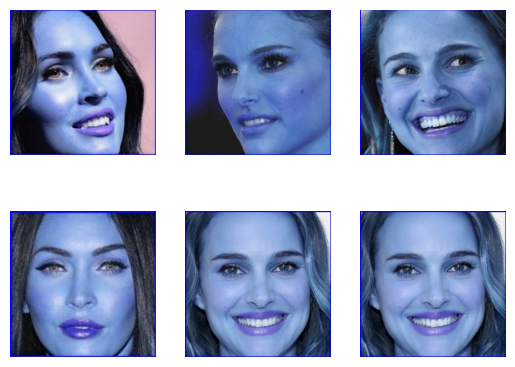

In [ ]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('cfaces_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
r = random.randint(1,len(src_images))
print(r)
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	print(src_images[r+i].astype('uint8'))
	pyplot.axis('off')
	pyplot.imshow(src_images[r+i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[r+i].astype('uint8'))
pyplot.show()

In [ ]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [ ]:
d_model = define_discriminator((256, 256, 3))
d_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 256, 256, 6)  0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
g_model = define_generator((256, 256, 3))
g_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  3136        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_5 (LeakyReLU)      (None, 128, 128, 64  0           ['conv2d_6[0][0]']               
                                )                                                           

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [ ]:
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 255.5) / 255.5
	X2 = (X2 - 255.5) / 255.5
	return [X1, X2]

In [ ]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [ ]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
# train pix2pix model
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		print(f'\tProgress: {100.*i/n_steps:.2f}%')
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

In [ ]:
# load image data
dataset = load_real_samples('cfaces_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (66, 256, 256, 3) (66, 256, 256, 3)


In [ ]:
dataset[0].shape[1:]

(256, 256, 3)

In [ ]:
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 872ms/step
>1, d1[0.409] d2[1.132] g[62.596]
	Progress: 0.00%
1/1 [==============================] - 0s 461ms/step
>2, d1[0.684] d2[0.937] g[46.334]
	Progress: 0.02%
1/1 [==============================] - 0s 462ms/step
>3, d1[0.409] d2[0.724] g[56.826]
	Progress: 0.03%
1/1 [==============================] - 0s 476ms/step
>4, d1[0.332] d2[0.590] g[48.272]
	Progress: 0.05%
1/1 [==============================] - 0s 456ms/step
>5, d1[0.335] d2[0.612] g[50.041]
	Progress: 0.06%
1/1 [==============================] - 1s 602ms/step
>6, d1[0.321] d2[0.472] g[46.906]
	Progress: 0.08%
1/1 [==============================] - 0s 458ms/step
>7, d1[0.326] d2[0.340] g[40.878]
	Progress: 0.09%
1/1 [==============================] - 0s 452ms/step
>8, d1[0.385] d2[0.342] g[42.084]
	Progress: 0.11%
1/1 [==============================] - 0s 450ms/step
>9, d1[0.287] d2[0.323] g[30.314]
	Progress: 0.12%
1/1 [==============================] - 1s 674ms/step
>10, d1[0.2

>Saved: plot_000660.png and model_000660.h5
1/1 [==============================] - 0s 469ms/step
>661, d1[0.004] d2[0.002] g[9.420]
	Progress: 10.00%
1/1 [==============================] - 1s 500ms/step
>662, d1[0.006] d2[0.002] g[7.028]
	Progress: 10.02%
1/1 [==============================] - 0s 470ms/step
>663, d1[0.001] d2[0.002] g[10.643]
	Progress: 10.03%
1/1 [==============================] - 0s 486ms/step
>664, d1[0.006] d2[0.002] g[8.951]
	Progress: 10.05%
1/1 [==============================] - 1s 509ms/step
>665, d1[0.002] d2[0.002] g[10.227]
	Progress: 10.06%
1/1 [==============================] - 0s 468ms/step
>666, d1[0.003] d2[0.002] g[13.611]
	Progress: 10.08%
1/1 [==============================] - 0s 465ms/step
>667, d1[0.001] d2[0.002] g[10.378]
	Progress: 10.09%
1/1 [==============================] - 1s 694ms/step
>668, d1[0.000] d2[0.002] g[10.371]
	Progress: 10.11%
1/1 [==============================] - 0s 490ms/step
>669, d1[0.002] d2[0.002] g[12.550]
	Progress: 10.

>Saved: plot_001320.png and model_001320.h5
1/1 [==============================] - 0s 473ms/step
>1321, d1[0.002] d2[0.001] g[6.011]
	Progress: 20.00%
1/1 [==============================] - 0s 485ms/step
>1322, d1[0.001] d2[0.001] g[6.115]
	Progress: 20.02%
1/1 [==============================] - 0s 468ms/step
>1323, d1[0.000] d2[0.001] g[8.491]
	Progress: 20.03%
1/1 [==============================] - 0s 479ms/step
>1324, d1[0.001] d2[0.001] g[5.742]
	Progress: 20.05%
1/1 [==============================] - 1s 687ms/step
>1325, d1[0.002] d2[0.000] g[6.387]
	Progress: 20.06%
1/1 [==============================] - 0s 476ms/step
>1326, d1[0.000] d2[0.001] g[7.462]
	Progress: 20.08%
1/1 [==============================] - 0s 484ms/step
>1327, d1[0.001] d2[0.001] g[5.616]
	Progress: 20.09%
1/1 [==============================] - 0s 475ms/step
>1328, d1[0.001] d2[0.001] g[7.412]
	Progress: 20.11%
1/1 [==============================] - 1s 524ms/step
>1329, d1[0.000] d2[0.000] g[7.813]
	Progress: 

>Saved: plot_001980.png and model_001980.h5
1/1 [==============================] - 0s 452ms/step
>1981, d1[0.000] d2[0.001] g[6.245]
	Progress: 30.00%
1/1 [==============================] - 1s 576ms/step
>1982, d1[0.000] d2[0.001] g[5.698]
	Progress: 30.02%
1/1 [==============================] - 0s 451ms/step
>1983, d1[0.003] d2[0.000] g[4.927]
	Progress: 30.03%
1/1 [==============================] - 0s 450ms/step
>1984, d1[0.000] d2[0.002] g[5.101]
	Progress: 30.05%
1/1 [==============================] - 0s 454ms/step
>1985, d1[0.000] d2[0.000] g[5.321]
	Progress: 30.06%
1/1 [==============================] - 1s 627ms/step
>1986, d1[0.002] d2[0.001] g[4.630]
	Progress: 30.08%
1/1 [==============================] - 0s 466ms/step
>1987, d1[0.000] d2[0.000] g[5.630]
	Progress: 30.09%
1/1 [==============================] - 0s 472ms/step
>1988, d1[0.000] d2[0.000] g[5.404]
	Progress: 30.11%
1/1 [==============================] - 0s 455ms/step
>1989, d1[0.000] d2[0.000] g[6.527]
	Progress: 

>Saved: plot_002640.png and model_002640.h5
1/1 [==============================] - 1s 705ms/step
>2641, d1[0.001] d2[0.000] g[4.853]
	Progress: 40.00%
1/1 [==============================] - 0s 473ms/step
>2642, d1[0.001] d2[0.000] g[5.324]
	Progress: 40.02%
1/1 [==============================] - 0s 469ms/step
>2643, d1[0.001] d2[0.000] g[4.859]
	Progress: 40.03%
1/1 [==============================] - 1s 519ms/step
>2644, d1[0.002] d2[0.001] g[4.335]
	Progress: 40.05%
1/1 [==============================] - 0s 467ms/step
>2645, d1[0.002] d2[0.002] g[5.931]
	Progress: 40.06%
1/1 [==============================] - 1s 576ms/step
>2646, d1[0.001] d2[0.000] g[4.561]
	Progress: 40.08%
1/1 [==============================] - 0s 455ms/step
>2647, d1[0.001] d2[0.001] g[5.520]
	Progress: 40.09%
1/1 [==============================] - 0s 456ms/step
>2648, d1[0.001] d2[0.001] g[4.375]
	Progress: 40.11%
1/1 [==============================] - 0s 474ms/step
>2649, d1[0.001] d2[0.001] g[4.785]
	Progress: 

>Saved: plot_003300.png and model_003300.h5
1/1 [==============================] - 1s 503ms/step
>3301, d1[0.000] d2[0.000] g[5.447]
	Progress: 50.00%
1/1 [==============================] - 0s 494ms/step
>3302, d1[0.001] d2[0.000] g[5.364]
	Progress: 50.02%
1/1 [==============================] - 0s 487ms/step
>3303, d1[0.001] d2[0.001] g[5.861]
	Progress: 50.03%
1/1 [==============================] - 0s 497ms/step
>3304, d1[0.000] d2[0.000] g[5.319]
	Progress: 50.05%
1/1 [==============================] - 0s 498ms/step
>3305, d1[0.000] d2[0.000] g[5.310]
	Progress: 50.06%
1/1 [==============================] - 1s 516ms/step
>3306, d1[0.000] d2[0.000] g[5.433]
	Progress: 50.08%
1/1 [==============================] - 0s 494ms/step
>3307, d1[0.000] d2[0.000] g[5.570]
	Progress: 50.09%
1/1 [==============================] - 0s 497ms/step
>3308, d1[0.001] d2[0.000] g[5.348]
	Progress: 50.11%
1/1 [==============================] - 1s 612ms/step
>3309, d1[0.000] d2[0.000] g[5.481]
	Progress: 

>Saved: plot_003960.png and model_003960.h5
1/1 [==============================] - 1s 699ms/step
>3961, d1[0.000] d2[0.000] g[3.904]
	Progress: 60.00%
1/1 [==============================] - 0s 480ms/step
>3962, d1[0.000] d2[0.000] g[3.643]
	Progress: 60.02%
1/1 [==============================] - 0s 495ms/step
>3963, d1[0.000] d2[0.000] g[3.126]
	Progress: 60.03%
1/1 [==============================] - 0s 466ms/step
>3964, d1[0.000] d2[0.000] g[4.336]
	Progress: 60.05%
1/1 [==============================] - 1s 651ms/step
>3965, d1[0.000] d2[0.002] g[4.101]
	Progress: 60.06%
1/1 [==============================] - 0s 481ms/step
>3966, d1[0.000] d2[0.000] g[3.402]
	Progress: 60.08%
1/1 [==============================] - 0s 484ms/step
>3967, d1[0.001] d2[0.000] g[4.312]
	Progress: 60.09%
1/1 [==============================] - 0s 472ms/step
>3968, d1[0.000] d2[0.000] g[4.284]
	Progress: 60.11%
1/1 [==============================] - 0s 469ms/step
>3969, d1[0.000] d2[0.000] g[4.066]
	Progress: 

>Saved: plot_004620.png and model_004620.h5
1/1 [==============================] - 0s 487ms/step
>4621, d1[0.000] d2[0.000] g[4.385]
	Progress: 70.00%
1/1 [==============================] - 0s 492ms/step
>4622, d1[0.000] d2[0.000] g[3.261]
	Progress: 70.02%
1/1 [==============================] - 1s 508ms/step
>4623, d1[0.000] d2[0.000] g[4.606]
	Progress: 70.03%
1/1 [==============================] - 0s 500ms/step
>4624, d1[0.000] d2[0.000] g[4.104]
	Progress: 70.05%
1/1 [==============================] - 1s 657ms/step
>4625, d1[0.000] d2[0.000] g[3.178]
	Progress: 70.06%
1/1 [==============================] - 1s 507ms/step
>4626, d1[0.000] d2[0.000] g[5.195]
	Progress: 70.08%
1/1 [==============================] - 0s 499ms/step
>4627, d1[0.000] d2[0.000] g[3.775]
	Progress: 70.09%
1/1 [==============================] - 1s 513ms/step
>4628, d1[0.000] d2[0.000] g[4.806]
	Progress: 70.11%
1/1 [==============================] - 1s 697ms/step
>4629, d1[0.000] d2[0.000] g[3.703]
	Progress: 

>Saved: plot_005280.png and model_005280.h5
1/1 [==============================] - 0s 495ms/step
>5281, d1[0.003] d2[0.003] g[3.548]
	Progress: 80.00%
1/1 [==============================] - 1s 510ms/step
>5282, d1[0.005] d2[0.001] g[3.537]
	Progress: 80.02%
1/1 [==============================] - 0s 476ms/step
>5283, d1[0.004] d2[0.001] g[3.736]
	Progress: 80.03%
1/1 [==============================] - 1s 506ms/step
>5284, d1[0.006] d2[0.001] g[3.645]
	Progress: 80.05%
1/1 [==============================] - 1s 511ms/step
>5285, d1[0.005] d2[0.001] g[3.304]
	Progress: 80.06%
1/1 [==============================] - 1s 691ms/step
>5286, d1[0.005] d2[0.004] g[4.333]
	Progress: 80.08%
1/1 [==============================] - 0s 478ms/step
>5287, d1[0.003] d2[0.000] g[3.380]
	Progress: 80.09%
1/1 [==============================] - 1s 508ms/step
>5288, d1[0.003] d2[0.001] g[2.960]
	Progress: 80.11%
1/1 [==============================] - 0s 496ms/step
>5289, d1[0.008] d2[0.004] g[3.449]
	Progress: 

>Saved: plot_005940.png and model_005940.h5
1/1 [==============================] - 0s 480ms/step
>5941, d1[0.000] d2[0.001] g[3.638]
	Progress: 90.00%
1/1 [==============================] - 1s 612ms/step
>5942, d1[0.000] d2[0.000] g[2.515]
	Progress: 90.02%
1/1 [==============================] - 0s 477ms/step
>5943, d1[0.001] d2[0.000] g[2.742]
	Progress: 90.03%
1/1 [==============================] - 1s 536ms/step
>5944, d1[0.000] d2[0.000] g[2.474]
	Progress: 90.05%
1/1 [==============================] - 0s 490ms/step
>5945, d1[0.000] d2[0.000] g[3.178]
	Progress: 90.06%
1/1 [==============================] - 1s 667ms/step
>5946, d1[0.000] d2[0.000] g[2.841]
	Progress: 90.08%
1/1 [==============================] - 0s 468ms/step
>5947, d1[0.000] d2[0.000] g[2.719]
	Progress: 90.09%
1/1 [==============================] - 1s 507ms/step
>5948, d1[0.000] d2[0.000] g[2.915]
	Progress: 90.11%
1/1 [==============================] - 0s 468ms/step
>5949, d1[0.000] d2[0.000] g[2.856]
	Progress: 

>Saved: plot_006600.png and model_006600.h5


In [ ]:
d = './drive/MyDrive/test_dl_dataset'
lst=[]
for o in os.listdir(d):
  print(os.path.join(d, o))
  if os.path.isdir and not o.startswith('.'):
    lst.append(os.path.join(d,o))

src = []
tgt = []
P = []
print('lst',lst)
for path in tqdm(lst):
    path1 = path +"/side/*.jpg"
    print("p1",path1,path)
    for file in glob.glob(path1):
        print(glob.glob(path1))
        print (file)
        a= cv2.imread(file)
        a= cv2.resize(a, (256,256), interpolation = cv2.INTER_AREA)
        file = file.split('/')
        file = (file[len(file) - 1])
        file = file.split('_')
        ylabel = (file[0])
        print("y label", ylabel, path)
        pose_label = (file[len(file) - 1]).split('.')[0]
        print("pose label", pose_label)
        if pose_label in ['06','02','04','05']:
            path2 = path+"/"+ylabel+"_01.jpg"
            print('if check',path2)
        elif pose_label in ['066','07','09','10']:
            path2 = path+"/"+ylabel+"_08.jpg"
        print('p2',path2)
        b= cv2.imread(path2)
        b= cv2.resize(b, (256,256), interpolation = cv2.INTER_AREA)
        src.append(a)
        tgt.append(b)

./drive/MyDrive/test_dl_dataset/Noah Centineo
./drive/MyDrive/test_dl_dataset/Lili Reinhart
./drive/MyDrive/test_dl_dataset/Blake Lively
./drive/MyDrive/test_dl_dataset/Anna Dearmas
./drive/MyDrive/test_dl_dataset/Ryan Reynolds
./drive/MyDrive/test_dl_dataset/Amber Heard
./drive/MyDrive/test_dl_dataset/Adam Sandler
lst ['./drive/MyDrive/test_dl_dataset/Noah Centineo', './drive/MyDrive/test_dl_dataset/Lili Reinhart', './drive/MyDrive/test_dl_dataset/Blake Lively', './drive/MyDrive/test_dl_dataset/Anna Dearmas', './drive/MyDrive/test_dl_dataset/Ryan Reynolds', './drive/MyDrive/test_dl_dataset/Amber Heard', './drive/MyDrive/test_dl_dataset/Adam Sandler']


 29%|██▊       | 2/7 [00:00<00:00, 17.19it/s]

p1 ./drive/MyDrive/test_dl_dataset/Noah Centineo/side/*.jpg ./drive/MyDrive/test_dl_dataset/Noah Centineo
['./drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_06.jpg', './drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_05.jpg', './drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_04.jpg', './drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_02.jpg']
./drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_06.jpg
y label Noah Centineo ./drive/MyDrive/test_dl_dataset/Noah Centineo
pose label 06
if check ./drive/MyDrive/test_dl_dataset/Noah Centineo/Noah Centineo_01.jpg
p2 ./drive/MyDrive/test_dl_dataset/Noah Centineo/Noah Centineo_01.jpg
['./drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_06.jpg', './drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_05.jpg', './drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_04.jpg', './drive/MyDrive/test_dl_dataset/Noah Centineo/side/Noah Centineo_0

100%|██████████| 7/7 [00:00<00:00, 20.51it/s]

04
if check ./drive/MyDrive/test_dl_dataset/Anna Dearmas/Anna Dearmas_01.jpg
p2 ./drive/MyDrive/test_dl_dataset/Anna Dearmas/Anna Dearmas_01.jpg
p1 ./drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/*.jpg ./drive/MyDrive/test_dl_dataset/Ryan Reynolds
['./drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_06.jpg', './drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_05.jpg', './drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_03.jpg']
./drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_06.jpg
y label Ryan Reynolds ./drive/MyDrive/test_dl_dataset/Ryan Reynolds
pose label 06
if check ./drive/MyDrive/test_dl_dataset/Ryan Reynolds/Ryan Reynolds_01.jpg
p2 ./drive/MyDrive/test_dl_dataset/Ryan Reynolds/Ryan Reynolds_01.jpg
['./drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_06.jpg', './drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_05.jpg', './drive/MyDrive/test_dl_dataset/Ryan Reynolds/side/Ryan Reynolds_03.jpg

In [ ]:
src = np.asarray(src)
tgt = np.asarray(tgt)
print(src,tgt)

[[[[  3  40 220]
   [ 14  42 143]
   [ 19  39  80]
   ...
   [ 21  31  63]
   [ 16  28  74]
   [ 15  37 113]]

  [[ 11  42 215]
   [ 18  39 125]
   [ 17  28  47]
   ...
   [ 18  22  20]
   [ 12  18  32]
   [ 15  30  76]]

  [[  8  41 214]
   [ 20  41 122]
   [ 20  31  38]
   ...
   [ 23  26   9]
   [ 15  21  22]
   [ 18  34  68]]

  ...

  [[ 13  39 216]
   [ 15  36 122]
   [ 12  22  34]
   ...
   [ 40  73 120]
   [ 37  70 128]
   [ 34  68 141]]

  [[  5  39 224]
   [  6  33 165]
   [  3  23 112]
   ...
   [ 24  59 167]
   [ 22  58 172]
   [ 17  56 178]]

  [[  0  36 222]
   [  3  39 215]
   [ 11  42 211]
   ...
   [  7  42 216]
   [  6  41 217]
   [  1  41 217]]]


 [[[  0  35 224]
   [ 20  48 217]
   [ 43  66 215]
   ...
   [ 54  70 210]
   [ 51  67 213]
   [ 13  44 221]]

  [[  7  41 219]
   [ 53  79 223]
   [128 148 249]
   ...
   [160 164 246]
   [131 137 242]
   [ 40  63 218]]

  [[  6  36 220]
   [ 62  86 221]
   [152 171 247]
   ...
   [201 190 235]
   [162 157 239]
   [ 52  69

In [ ]:
filename = 'cfaces_256.npz'
savez_compressed(filename, src, tgt)
print('Saved dataset: ', filename)

Saved dataset:  cfaces_256.npz


In [ ]:
compile = False
[X1, X2] = load_real_samples('cfaces_256.npz')
print('Loaded', X1.shape, X2.shape)

Loaded (20, 256, 256, 3) (20, 256, 256, 3)


In [ ]:
# select random example
ix = randint(0, len(X1), 1) 
src_image, tar_image = X1[ix], X2[ix]

In [ ]:
model = tf.keras.models.load_model('model_006600.h5', compile = False)
opt = Adam(lr=0.0002, beta_1=0.5)
model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt)

In [ ]:
# generate image from source
gen_image = model.predict(src_image)

1/1 [==============================] - 1s 1s/step


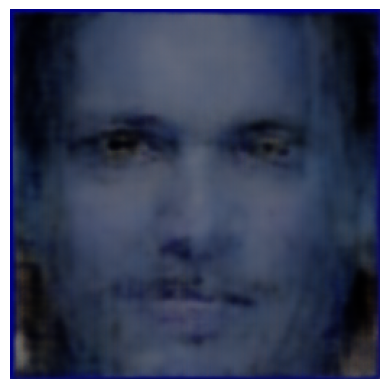

In [ ]:
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image
pyplot.imshow(gen_image[0])
pyplot.axis('off')
pyplot.show()

In [ ]:
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()

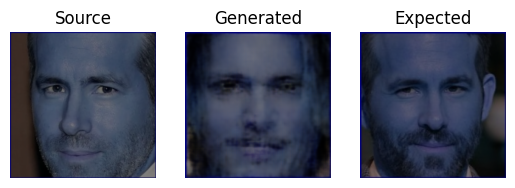

True

In [ ]:
# plot all three images
plot_images(src_image, gen_image, tar_image)